In [2]:
# Importing the necessary libraries

# pandas is a data analysis library used for data manipulation and analysis.
# numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices.
# matplotlib is a data visualization library for creating static, animated, and interactive visualizations in Python.
# seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
# scipy is a library for scientific computing and technical computing.
# datetime is a module that supplies classes for working with dates and times.
# plotly is a data visualization library that creates interactive charts and plots.

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import plotly
import plotly.express as px
plt.style.use('seaborn-v0_8-colorblind')

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the Airbnb Stockholm dataset into a pandas DataFrame

# The dataset is read from the CSV file and loaded into a pandas DataFrame called 'airbnb_df'.
# This dataset contains information on Airbnb listings in Stockholm.

airbnb_df = pd.read_csv('listings.csv')

In [4]:
# Check the shape of the DataFrame to get an idea of the size of the dataset(number of rows, number of columns)
print(airbnb_df.shape)

(3339, 75)


In [5]:
#Checking datatypes
print(airbnb_df.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


In [6]:
#Getting detailed summary of dataframe
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3339 non-null   int64  
 1   listing_url                                   3339 non-null   object 
 2   scrape_id                                     3339 non-null   int64  
 3   last_scraped                                  3339 non-null   object 
 4   source                                        3339 non-null   object 
 5   name                                          3337 non-null   object 
 6   description                                   3234 non-null   object 
 7   neighborhood_overview                         1561 non-null   object 
 8   picture_url                                   3339 non-null   object 
 9   host_id                                       3339 non-null   i

In [7]:
# Checking the first 5 rows with complete display of columns using display max columns function, to get an idea of the dataframe structure
pd.set_option('display.max_columns', None)

airbnb_df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20221229235426,2022-12-30,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,https://www.airbnb.com/users/show/397766,Peter,2011-02-18,"Stockholm, Sweden",Easy going and pragmatic when it comes to livi...,NaN,NaN,0%,f,https://a0.muscache.com/im/users/397766/profil...,https://a0.muscache.com/im/users/397766/profil...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Skarpnäcks,NaN,59.30117,18.12833,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,1.0,"[""Shampoo"", ""Iron"", ""Long term stays allowed"",...",$949.00,30,100,30.0,30.0,100.0,100.0,30.0,100.0,NaN,t,28,58,88,178,2022-12-30,10,0,0,2013-08-02,2016-07-08,4.80,5.00,4.89,4.89,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,164448,https://www.airbnb.com/rooms/164448,20221229235426,2022-12-30,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/1101571/13429...,784312,https://www.airbnb.com/users/show/784312,Li,2011-07-06,"Stockholm, Sweden","I am a recently retired lady, who has two room...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/784312/profil...,https://a0.muscache.com/im/users/784312/profil...,Södermalm,2,2,"['email', 'phone']",t,t,NaN,Södermalms,NaN,59.31389,18.06087,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,2.0,"[""Dryer"", ""Bathtub"", ""Smoke alarm"", ""Washer"", ...",$864.00,3,300,3.0,3.0,300.0,300.0,3.0,300.0,NaN,t,27,57,87,177,2022-12-30,355,33,0,2011-07-30,2022-11-27,4.85,4.87,4.81,4.96,4.97,4.83,4.76,NaN,t,2,0,2,0,2.55
2,170651,https://www.airbnb.com/rooms/170651,20221229235426,2022-12-30,city scrape,Petit Charm Rooftop next to heaven,My place is perfect for 1 person or mabey 2 if...,NaN,https://a0.muscache.com/pictures/74dc2c29-1f7a...,814021,https://www.airbnb.com/users/show/814021,Marie,2011-07-13,"Stockholm, Sweden",Im a happy person living with my Cat Louise.\...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/137c6...,https://a0.muscache.com/im/pictures/user/137c6...,Södermalm,1,1,"['email', 'phone']",t,t,NaN,Södermalms,NaN,59.31702,18.02946,Entire condo,Entire home/apt,2,NaN,1.5 baths,1.0,2.0,"[""Shampoo"", ""Private hot tub"", ""Long term stay...","$1,055.00",4,30,4.0,4.0,30.0,30.0,4.0,30.0,NaN,t,9,23,33,248,2022-12-30,42,3,0,2011-08-14,2022-10-02,4.68,4.84,4.55,4.89,4.92,4.84,4.74,NaN,f,1,1,0,0,0.30
3,206221,https://www.airbnb.com/rooms/206221,20221229235426,2022-12-30,city scrape,Do

In [8]:
#Creating a copy of selected columns to perform basic EDA analysis i.e stats (Mean, median etc..) analysis, price distributions analysis, host analysis, booking analysis   
dp_airbnb_df = airbnb_df[['host_id','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','latitude','longitude','price','number_of_reviews','property_type','room_type','bedrooms','beds','amenities','availability_365']].copy()

In [9]:
dp_airbnb_df.head(5)

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,price,number_of_reviews,property_type,room_type,bedrooms,beds,amenities,availability_365
0,397766,NaN,0%,f,Skarpnäcks,59.30117,18.12833,$949.00,10,Entire rental unit,Entire home/apt,2.0,1.0,"[""Shampoo"", ""Iron"", ""Long term stays allowed"",...",178
1,784312,100%,100%,t,Södermalms,59.31389,18.06087,$864.00,355,Private room in rental unit,Private room,1.0,2.0,"[""Dryer"", ""Bathtub"", ""Smoke alarm"", ""Washer"", ...",177
2,814021,100%,29%,f,Södermalms,59.31702,18.02946,"$1,055.00",42,Entire condo,Entire home/apt,1.0,2.0,"[""Shampoo"", ""Private hot tub"", ""Long term stay...",248
3,1022374,0%,0%,f,Södermalms,59.31074,18.08128,$669.00,79,Shared room in rental unit,Shared room,1.0,2.0,"[""Shampoo"", ""Iron"", ""Hangers"", ""Wifi"", ""Hot wa...",360
4,993889,100%,17%,f,Södermalms,59.30903,18.08032,$829.00,41,Entire condo,Entire home/apt,1.0,4.0,"[""Children\u2019s books and toys"", ""Dryer"", ""O...",4


In [10]:
print(dp_airbnb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 3339 non-null   int64  
 1   host_response_rate      2254 non-null   object 
 2   host_acceptance_rate    2812 non-null   object 
 3   host_is_superhost       3334 non-null   object 
 4   neighbourhood_cleansed  3339 non-null   object 
 5   latitude                3339 non-null   float64
 6   longitude               3339 non-null   float64
 7   price                   3339 non-null   object 
 8   number_of_reviews       3339 non-null   int64  
 9   property_type           3339 non-null   object 
 10  room_type               3339 non-null   object 
 11  bedrooms                3067 non-null   float64
 12  beds                    3286 non-null   float64
 13  amenities               3339 non-null   object 
 14  availability_365        3339 non-null   

In [11]:
# Check for missing values
null_counts = dp_airbnb_df.isnull().sum()
#create a boolean mask of columns that have atleast one null value
null_mask = null_counts > 0 
#filter the null _counts series to only include columns with null values
null_counts_filtered = null_counts[null_mask]
print(null_counts_filtered)

host_response_rate      1085
host_acceptance_rate     527
host_is_superhost          5
bedrooms                 272
beds                      53
dtype: int64


In [12]:
# Converting host_id & price to object
dp_airbnb_df['price'] = dp_airbnb_df['price'].str.replace('$', '').str.replace(',', '').astype('float')
dp_airbnb_df['host_id'] = dp_airbnb_df.host_id.astype(str)
dp_airbnb_df.head(5)


,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,price,number_of_reviews,property_type,room_type,bedrooms,beds,amenities,availability_365
0,397766,NaN,0%,f,Skarpnäcks,59.30117,18.12833,949.0,10,Entire rental unit,Entire home/apt,2.0,1.0,"[""Shampoo"", ""Iron"", ""Long term stays allowed"",...",178
1,784312,100%,100%,t,Södermalms,59.31389,18.06087,864.0,355,Private room in rental unit,Private room,1.0,2.0,"[""Dryer"", ""Bathtub"", ""Smoke alarm"", ""Washer"", ...",177
2,814021,100%,29%,f,Södermalms,59.31702,18.02946,1055.0,42,Entire condo,Entire home/apt,1.0,2.0,"[""Shampoo"", ""Private hot tub"", ""Long term stay...",248
3,1022374,0%,0%,f,Södermalms,59.31074,18.08128,669.0,79,Shared room in rental unit,Shared room,1.0,2.0,"[""Shampoo"", ""Iron"", ""Hangers"", ""Wifi"", ""Hot wa...",360
4,993889,100%,17%,f,Södermalms,59.30903,18.08032,829.0,41,Entire condo,Entire home/apt,1.0,4.0,"[""Children\u2019s books and toys"", ""Dryer"", ""O...",4


Insights from the above observations are;
1) Those columns(host_acceptance_rate),(host_is_superhost),(bedrooms) & (beds) which shows NaN values, changed to 0 for error free analysis.
2) Prices with 0 values found to be incorrect therefore they must be removed from the dataframe.

In [13]:
dp_airbnb_df.describe()

,latitude,longitude,price,number_of_reviews,bedrooms,beds,availability_365
count,3339.000000,3339.000000,3339.000000,3339.000000,3067.000000,3286.000000,3339.000000
mean,59.319302,18.032603,1917.096436,27.387242,1.669058,2.157943,135.754118
std,0.029821,0.063394,16322.590282,56.554884,1.108453,1.710833,138.868128
min,59.231950,17.773110,0.000000,0.000000,1.000000,1.000000,0.000000
25%,59.300990,18.004925,700.000000,1.000000,1.000000,1.000000,0.000000
50%,59.318020,18.049960,1072.000000,7.000000,1.000000,2.000000,83.000000
75%,59.337804,18.076085,1650.000000,26.000000,2.000000,3.000000,272.000000
max,59.418580,18.166070,672896.000000,829.000000,12.000000,22.000000,365.000000


In [14]:
#Removing 0 from price columns using loc[] to exclude zero values from the column price

dp_airbnb_df = dp_airbnb_df.loc[dp_airbnb_df['price'] > 0]


In [15]:
print(dp_airbnb_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3338
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 3334 non-null   object 
 1   host_response_rate      2252 non-null   object 
 2   host_acceptance_rate    2808 non-null   object 
 3   host_is_superhost       3334 non-null   object 
 4   neighbourhood_cleansed  3334 non-null   object 
 5   latitude                3334 non-null   float64
 6   longitude               3334 non-null   float64
 7   price                   3334 non-null   float64
 8   number_of_reviews       3334 non-null   int64  
 9   property_type           3334 non-null   object 
 10  room_type               3334 non-null   object 
 11  bedrooms                3067 non-null   float64
 12  beds                    3286 non-null   float64
 13  amenities               3334 non-null   object 
 14  availability_365        3334 non-null   

In [17]:
#Basic statistical analysis of specific datatype after removing 0 from price to get acurate price analysis
dp_airbnb_df.select_dtypes(include=['int64','float64']).describe()


,latitude,longitude,price,number_of_reviews,bedrooms,beds,availability_365
count,3334.000000,3334.000000,3334.000000,3334.000000,3067.000000,3286.000000,3334.000000
mean,59.319246,18.032674,1919.971506,27.423515,1.669058,2.157943,135.957708
std,0.029790,0.063395,16334.659844,56.589462,1.108453,1.710833,138.872597
min,59.231950,17.773110,126.000000,0.000000,1.000000,1.000000,0.000000
25%,59.300965,18.005053,700.000000,1.000000,1.000000,1.000000,0.000000
50%,59.318005,18.049975,1073.500000,7.000000,1.000000,2.000000,84.000000
75%,59.337770,18.076113,1650.000000,26.750000,2.000000,3.000000,272.000000
max,59.418580,18.166070,672896.000000,829.000000,12.000000,22.000000,365.000000


In [18]:
#analyzing from different perspective to get a sense of the distribution of values in each column of a dataset.
dp_airbnb_df.select_dtypes(include=['object']).describe()

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,amenities
count,3334,2252,2808,3334,3334,3334,3334,3334
unique,2664,42,91,2,14,46,4,3212
top,22876006,100%,100%,f,Södermalms,Entire rental unit,Entire home/apt,"[""Dryer"", ""Crib"", ""Smoke alarm"", ""Dishwasher"",..."
freq,65,1671,947,2778,960,1519,2618,11


In [19]:
# Check overall data stats
dp_airbnb_df.describe()


,latitude,longitude,price,number_of_reviews,bedrooms,beds,availability_365
count,3334.000000,3334.000000,3334.000000,3334.000000,3067.000000,3286.000000,3334.000000
mean,59.319246,18.032674,1919.971506,27.423515,1.669058,2.157943,135.957708
std,0.029790,0.063395,16334.659844,56.589462,1.108453,1.710833,138.872597
min,59.231950,17.773110,126.000000,0.000000,1.000000,1.000000,0.000000
25%,59.300965,18.005053,700.000000,1.000000,1.000000,1.000000,0.000000
50%,59.318005,18.049975,1073.500000,7.000000,1.000000,2.000000,84.000000
75%,59.337770,18.076113,1650.000000,26.750000,2.000000,3.000000,272.000000
max,59.418580,18.166070,672896.000000,829.000000,12.000000,22.000000,365.000000


Lets change the column name 'number_of_reviews' to 'bookings' assume all the number of reviews considered confirmed paid bookings.


In [20]:
#Renaming number_of_reviews column to booking
dp_airbnb_df = dp_airbnb_df.rename(columns = {'number_of_reviews': 'bookings'})
dp_airbnb_df

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,price,bookings,property_type,room_type,bedrooms,beds,amenities,availability_365
0,397766,NaN,0%,f,Skarpnäcks,59.301170,18.128330,949.0,10,Entire rental unit,Entire home/apt,2.0,1.0,"[""Shampoo"", ""Iron"", ""Long term stays allowed"",...",178
1,784312,100%,100%,t,Södermalms,59.313890,18.060870,864.0,355,Private room in rental unit,Private room,1.0,2.0,"[""Dryer"", ""Bathtub"", ""Smoke alarm"", ""Washer"", ...",177
2,814021,100%,29%,f,Södermalms,59.317020,18.029460,1055.0,42,Entire condo,Entire home/apt,1.0,2.0,"[""Shampoo"", ""Private hot tub"", ""Long term stay...",248
3,1022374,0%,0%,f,Södermalms,59.310740,18.081280,669.0,79,Shared room in rental unit,Shared room,1.0,2.0,"[""Shampoo"", ""Iron"", ""Hangers"", ""Wifi"", ""Hot wa...",360
4,993889,100%,17%,f,Södermalms,59.309030,18.080320,829.0,41,Entire condo,Entire home/apt,1.0,4.0,"[""Children\u2019s books and toys"", ""Dryer"", ""O...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,123024137,100%,75%,f,Östermalms,59.345373,18.086362,544.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""BBQ grill"", ""Single level home"", ""Room-darke...",257
3335,490456376,100%,100%,f,Spånga-Tensta,59.397258,17.892283,302.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""BBQ grill"", ""Long term stays allowed"", ""Air ...",358
3336,458867429,NaN,NaN,f,Skarpnäcks,59.268056,18.136576,500.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""Room-darkening shades"", ""Bathtub"", ""Safe"", ""...",203
3337,348391808,NaN,NaN,f,Älvsjö,59.276236,18.013666,560.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""Long term stays allowed"", ""Wifi"", ""Kitchen"",...",30


In [21]:
#DataFrame that contains only the rows that have missing values in at least one column to better understand NaN values.
dp_airbnb_df[dp_airbnb_df.isnull().any(axis=1)]

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,price,bookings,property_type,room_type,bedrooms,beds,amenities,availability_365
0,397766,NaN,0%,f,Skarpnäcks,59.301170,18.128330,949.0,10,Entire rental unit,Entire home/apt,2.0,1.0,"[""Shampoo"", ""Iron"", ""Long term stays allowed"",...",178
8,1432722,NaN,33%,f,Södermalms,59.305430,18.107710,2616.0,8,Entire rental unit,Entire home/apt,3.0,3.0,"[""Long term stays allowed"", ""TV with standard ...",363
13,1533849,NaN,NaN,f,Norrmalms,59.342830,18.049300,430.0,51,Private room in loft,Private room,1.0,1.0,"[""Extra pillows and blankets"", ""BBQ grill"", ""O...",0
14,1930434,NaN,33%,f,Farsta,59.250940,18.096760,1200.0,8,Entire townhouse,Entire home/apt,4.0,5.0,"[""Extra pillows and blankets"", ""BBQ grill"", ""R...",0
16,2200827,NaN,50%,f,Hägersten-Liljeholmens,59.310590,18.023690,571.0,98,Private room in rental unit,Private room,1.0,1.0,"[""Single level home"", ""Dryer"", ""Bathtub"", ""Fre...",90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,469528727,100%,NaN,f,Enskede-Årsta-Vantörs,59.264466,18.042481,500.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""Dishes and silverware"", ""Patio or balcony"", ...",17
3330,32514805,NaN,NaN,f,Bromma,59.337380,17.972010,2800.0,0,Entire home,Entire home/apt,3.0,4.0,"[""Piano"", ""BBQ grill"", ""Long term stays allowe...",242
3333,492963558,NaN,NaN,f,Södermalms,59.307788,18.078359,598.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""Wifi"", ""Long term stays allowed"", ""TV"", ""Kit...",65
3336,458867429,NaN,NaN,f,Skarpnäcks,59.268056,18.136576,500.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""Room-darkening shades"", ""Bathtub"", ""Safe"", ""...",203


#### In the above output lets analyze the NaN values in details to check whether these NaN values are random unfilled cells or needed to be addressed. Also relationship with bookings needed to be analyze

In [22]:
pd.set_option('display.max_rows', None)
df_sorted = dp_airbnb_df[dp_airbnb_df['host_acceptance_rate'].isna()].sort_values(by=['bookings', 'host_acceptance_rate'])
df_sorted

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,price,bookings,property_type,room_type,bedrooms,beds,amenities,availability_365
65,6854622,NaN,NaN,f,Kungsholmens,59.318860,17.984790,3564.0,0,Private room in villa,Private room,1.0,NaN,"[""Long term stays allowed""]",365
80,8085644,NaN,NaN,f,Enskede-Årsta-Vantörs,59.259600,18.025150,824.0,0,Private room in rental unit,Private room,1.0,1.0,"[""Long term stays allowed"", ""Wifi"", ""Kitchen"",...",0
137,8483582,NaN,NaN,f,Älvsjö,59.276910,18.001040,1200.0,0,Private room in guesthouse,Private room,1.0,1.0,"[""BBQ grill"", ""Long term stays allowed"", ""Wifi...",365
169,107502,100%,NaN,f,Södermalms,59.307590,18.089460,415.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""Long term stays allowed"", ""TV with standard ...",152
208,24368398,NaN,NaN,f,Södermalms,59.315490,18.084490,850.0,0,Private room in rental unit,Private room,1.0,1.0,"[""Shampoo"", ""Long term stays allowed"", ""Dryer""...",0
223,27353732,NaN,NaN,f,Södermalms,59.307210,18.087850,3000.0,0,Entire rental unit,Entire home/apt,1.0,1.0,"[""Shampoo"", ""Long term stays allowed"", ""Dryer""...",0
240,19147433,NaN,NaN,f,Södermalms,59.304120,18.113620,1000.0,0,Entire rental unit,Entire home/apt,2.0,4.0,"[""Long term stays allowed"", ""TV with standard ...",0
245,22438821,NaN,NaN,f,Hägersten-Liljeholmens,59.301460,18.006280,950.0,0,Entire rental unit,Entire home/apt,NaN,1.0,"[""Long term stays allowed"", ""Dishes and silver...",0
284,34247166,NaN,NaN,f,Östermalms,59.347030,18.105520,1119.0,0,Entire rental unit,Entire home/apt,1.0,2.0,"[""Long term stays allowed"", ""Dryer"", ""Wifi"", ""...",0
290,34327565,NaN,NaN,f,Spånga-Tensta,59.395600,17.910160,800.0,0,Private room in rental unit,Private room,1.0,1.0,"[""Long term stays allowed""]",0


We witness that despite (NaN) response by the host as (Host acceptance rate) which means host did not responded the queries of possible guest, still the maximum number of confirmed booking noteced in the above output maximum which is 829 times.
#####Now lets Plot & Observe data in visualization:
1) Which property type got maximum number of bookings.
2) Mean price distribution across different neighborhood.
3) Maximum number of bookings recived accross different neighborhood.
4) Which property type recived bookings accross different neighborhood. 
5) Which amenties influence maximum number of its booking.
6) Listed Amenties accorss different neighborhood.
7) Scatterplot analysis on host response rate on bookings
8) Listed properties density on actual Geolocation.
9) Occupancy rate by property type accorss different neighborhood.

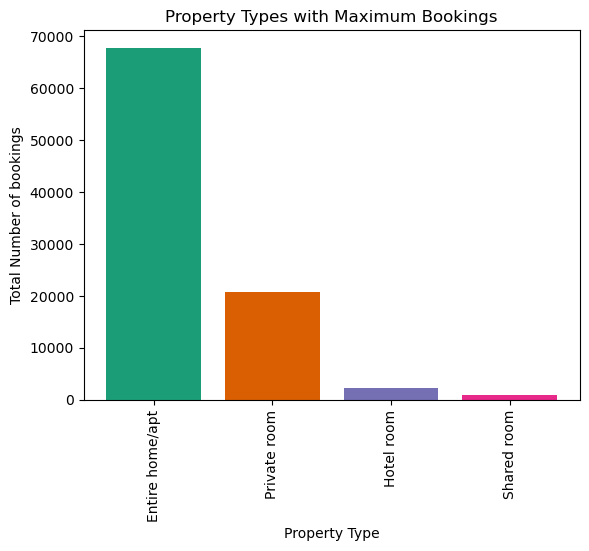

In [24]:
# Group by property_type and sum number_of_reviews
max_bookings = dp_airbnb_df.groupby('room_type')['bookings'].sum()

# Sort the results in descending order
max_bookings = max_bookings.sort_values(ascending=False)

# Define the color scheme
colors = plt.cm.Dark2(range(len(max_bookings)))

# Plot the bar chart
plt.bar(max_bookings.index, max_bookings.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Total Number of bookings')
plt.title('Property Types with Maximum Bookings')
plt.show()

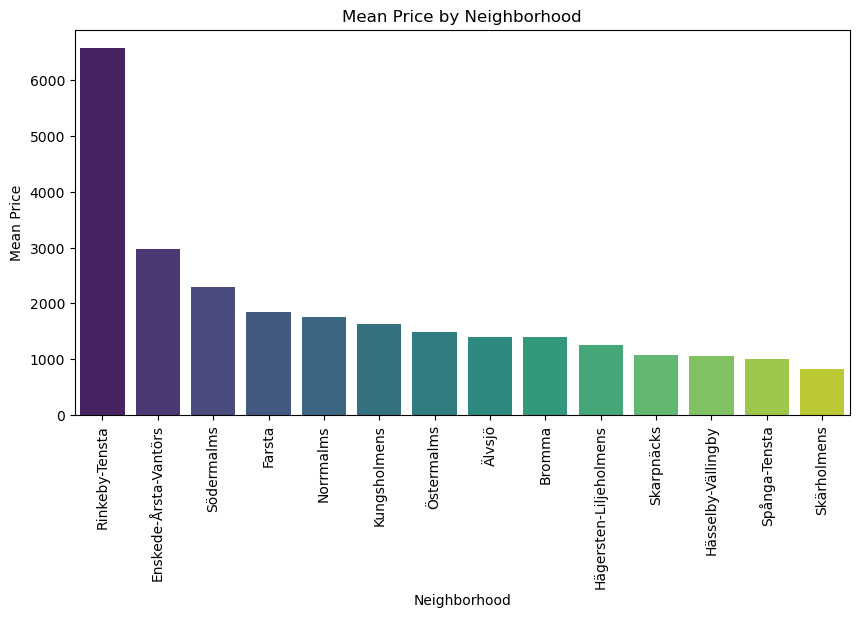

In [25]:
# Calculate the mean price by neighborhood
price_by_neighborhood = dp_airbnb_df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Sort the results in descending order
price_by_neighborhood = price_by_neighborhood.sort_values('price', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=price_by_neighborhood, x='neighbourhood_cleansed', y='price', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.title('Mean Price by Neighborhood')
plt.show()

In [26]:
dp_airbnb_df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False)

neighbourhood_cleansed
Rinkeby-Tensta            6575.642857
Enskede-Årsta-Vantörs     2979.640569
Södermalms                2284.652083
Farsta                    1850.368932
Norrmalms                 1752.134078
Kungsholmens              1621.530612
Östermalms                1493.138528
Älvsjö                    1400.738318
Bromma                    1388.589189
Hägersten-Liljeholmens    1243.755627
Skarpnäcks                1081.482759
Hässelby-Vällingby        1048.825000
Spånga-Tensta             1003.540000
Skärholmens                819.585366
Name: price, dtype: float64

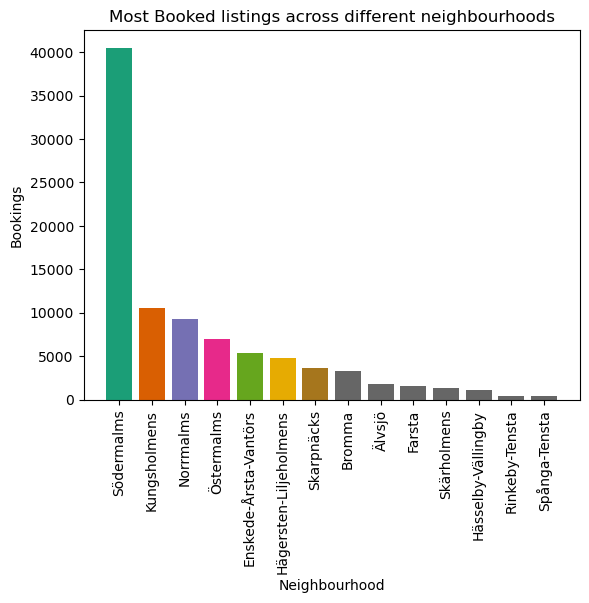

In [27]:
# Group by neighbourhood to analyze which neighbourhood got max number of bookings
neighborhood_bookings = dp_airbnb_df.groupby('neighbourhood_cleansed')['bookings'].sum()

# Sort the results in descending order
neighborhood_bookings = neighborhood_bookings.sort_values(ascending=False)

# Define the color scheme
colors = plt.cm.Dark2(range(len(neighborhood_bookings)))

# Plot the bar chart
plt.bar(neighborhood_bookings.index, neighborhood_bookings.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Bookings')
plt.title('Most Booked listings across different neighbourhoods')
plt.show()

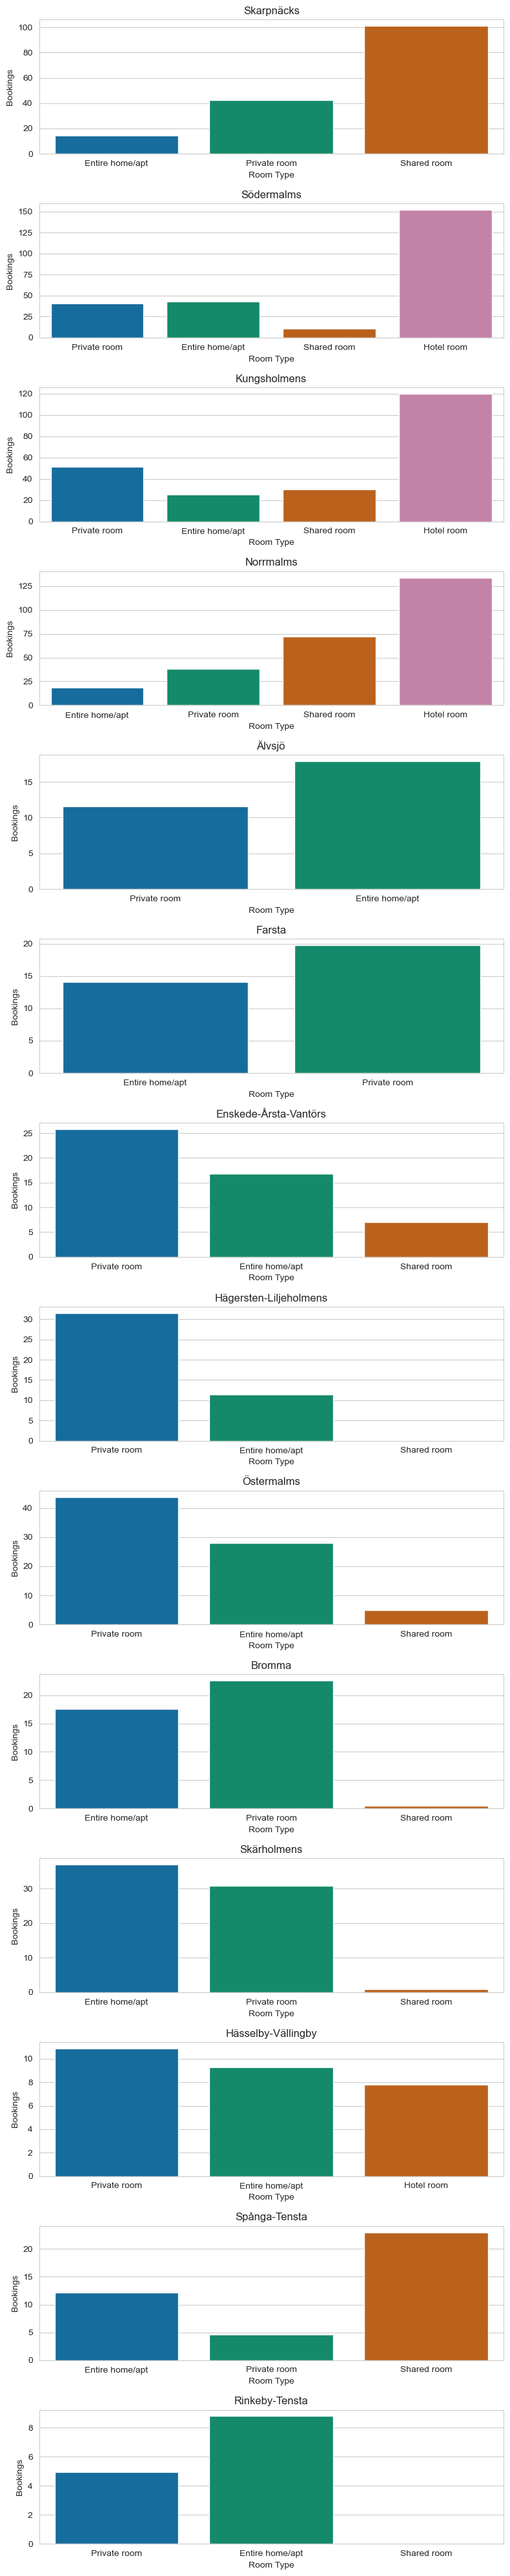

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Get unique neighborhoods
neighborhoods = dp_airbnb_df['neighbourhood_cleansed'].unique()

# Create subplots for each neighborhood
fig, axs = plt.subplots(len(neighborhoods), figsize=(8, 40))

# Loop through neighborhoods and create bar plot for each
for i, n in enumerate(neighborhoods):
    # Subset data for current neighborhood
    data = dp_airbnb_df[dp_airbnb_df['neighbourhood_cleansed'] == n]
    
    # Create bar plot
    sns.barplot(ax=axs[i], x='room_type', y='bookings', data=data, ci=None)
    
    # Add title for subplot
    axs[i].set_title(n)
    
    # Add labels for x and y axes
    axs[i].set_xlabel('Room Type')
    axs[i].set_ylabel('Bookings')
    
# Adjust layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


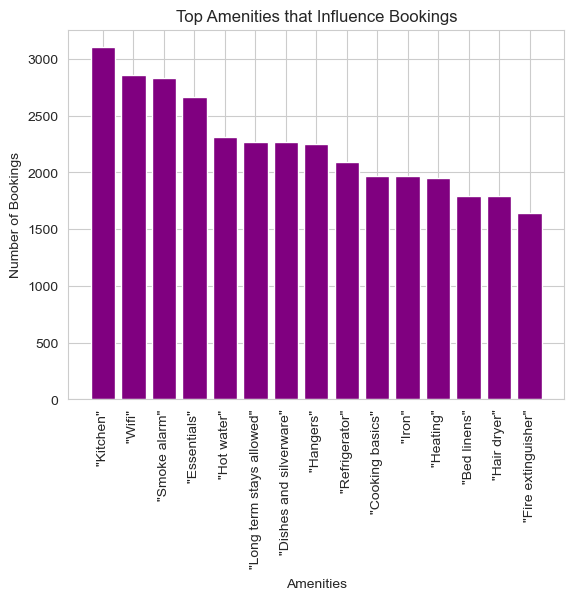

In [29]:
# Extract amenities column and count their occurrences
amenities_count = dp_airbnb_df['amenities'].str.get_dummies(sep=',').sum()

# Sort amenities in descending order based on their count
top_amenities = amenities_count.sort_values(ascending=False).head(15)

# Plot the top N amenities
plt.bar(top_amenities.index, top_amenities.values, color='purple')
plt.xticks(rotation=90)
plt.xlabel('Amenities')
plt.ylabel('Number of Bookings')
plt.title('Top Amenities that Influence Bookings')
plt.show()


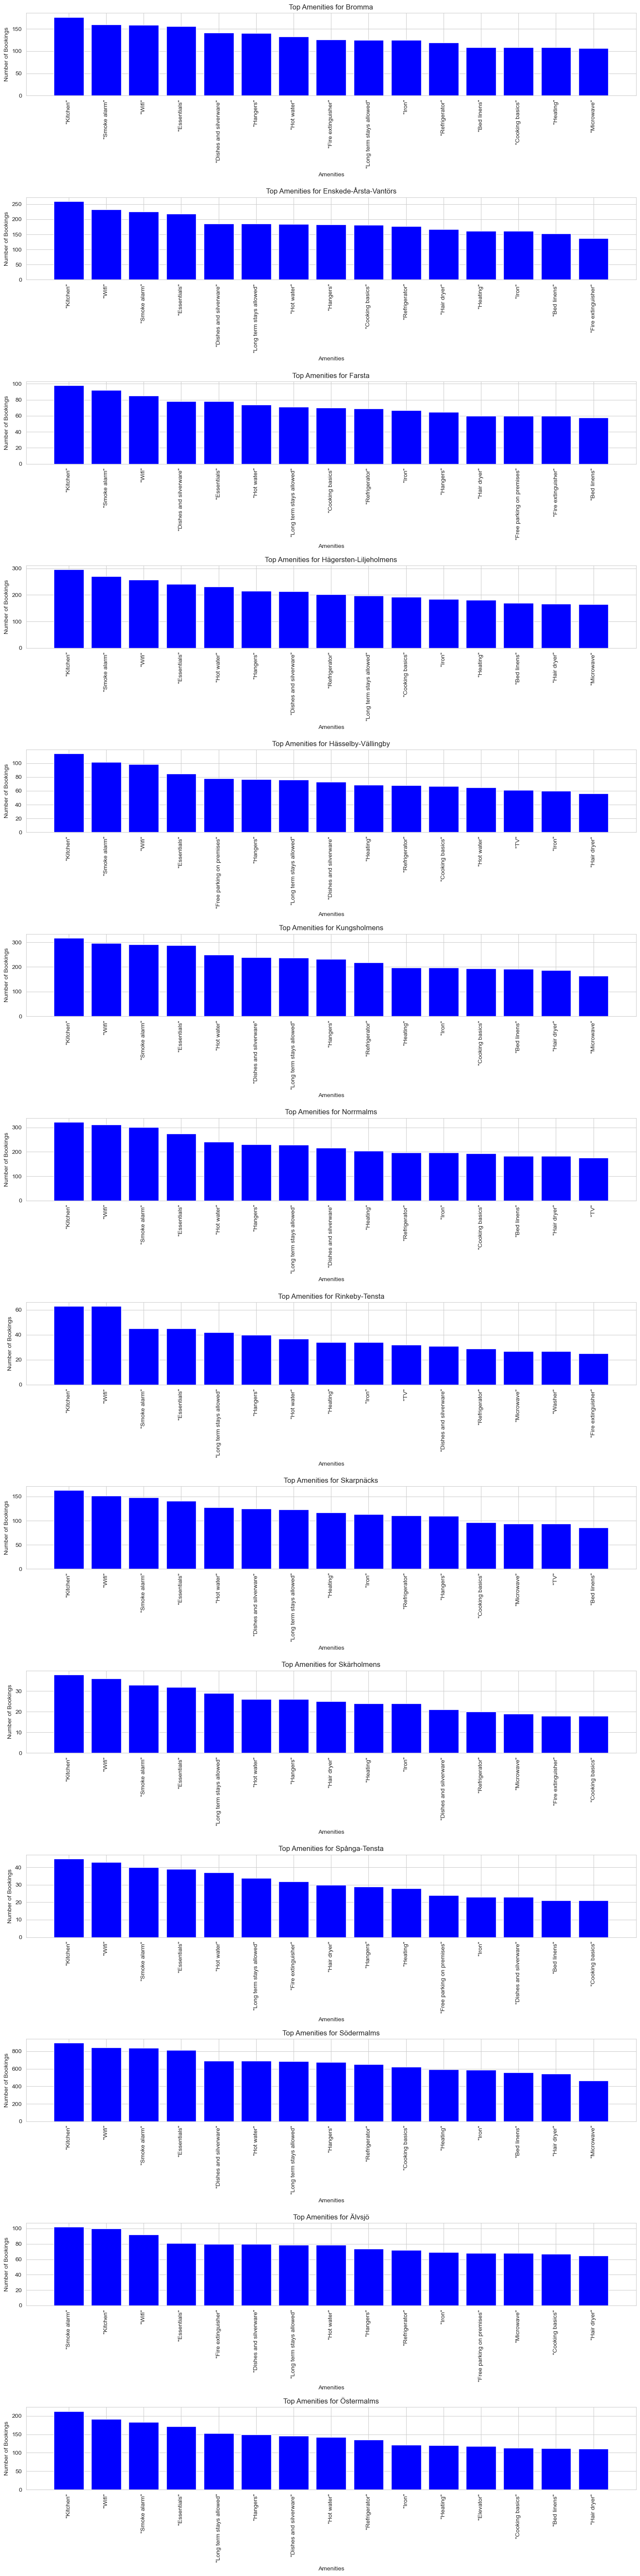

In [31]:
# Group the dataset by neighbourhood
neighbourhood_groups = dp_airbnb_df.groupby('neighbourhood_cleansed')

# Create subplots for each neighbourhood
fig, axes = plt.subplots(nrows=len(neighbourhood_groups), figsize=(15, 60))

# Loop through each neighbourhood and plot the top amenities
for i, (neighbourhood, group) in enumerate(neighbourhood_groups):
    # Extract top amenities for the neighbourhood
    amenities_count = group['amenities'].str.get_dummies(sep=',').sum()
    top_amenities = amenities_count.sort_values(ascending=False).head(15)
    
    # Create bar plot
    axes[i].bar(top_amenities.index, top_amenities.values, color='blue')
    axes[i].set_title(f'Top Amenities for {neighbourhood}')
    axes[i].set_xlabel('Amenities')
    axes[i].set_ylabel('Number of Bookings')
    axes[i].tick_params(axis='x', rotation=90)
    
# Adjust layout and display plot
fig.tight_layout()
plt.show()

In [32]:
dp_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3338
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 3334 non-null   object 
 1   host_response_rate      2252 non-null   object 
 2   host_acceptance_rate    2808 non-null   object 
 3   host_is_superhost       3334 non-null   object 
 4   neighbourhood_cleansed  3334 non-null   object 
 5   latitude                3334 non-null   float64
 6   longitude               3334 non-null   float64
 7   price                   3334 non-null   float64
 8   bookings                3334 non-null   int64  
 9   property_type           3334 non-null   object 
 10  room_type               3334 non-null   object 
 11  bedrooms                3067 non-null   float64
 12  beds                    3286 non-null   float64
 13  amenities               3334 non-null   object 
 14  availability_365        3334 non-null   

In [33]:
#changing the datatype of column host_response_rate to int/float to avoid error
dp_airbnb_df['host_response_rate'] = dp_airbnb_df['host_response_rate'].fillna('-1').str.replace('%', '').astype(float).fillna(-1).astype(int)

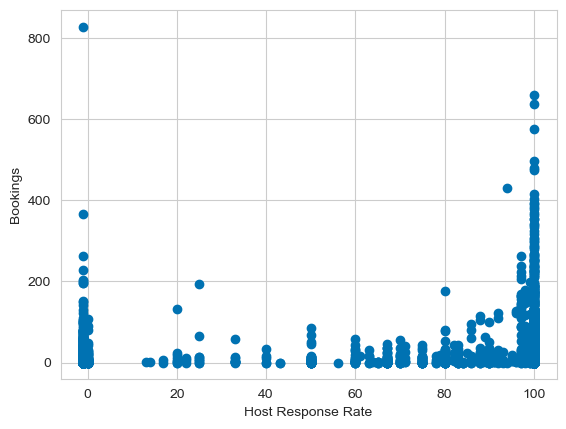

In [34]:
# Analyzing host response rate against bookings using scatterplot
plt.scatter(dp_airbnb_df['host_response_rate'], dp_airbnb_df['bookings'])
plt.xlabel('Host Response Rate')
plt.ylabel('Bookings')
plt.show()

Above plot shows, responses between 50% to 90% recives equal amount of bookings while above than 90% response rates, host receives higher bookings

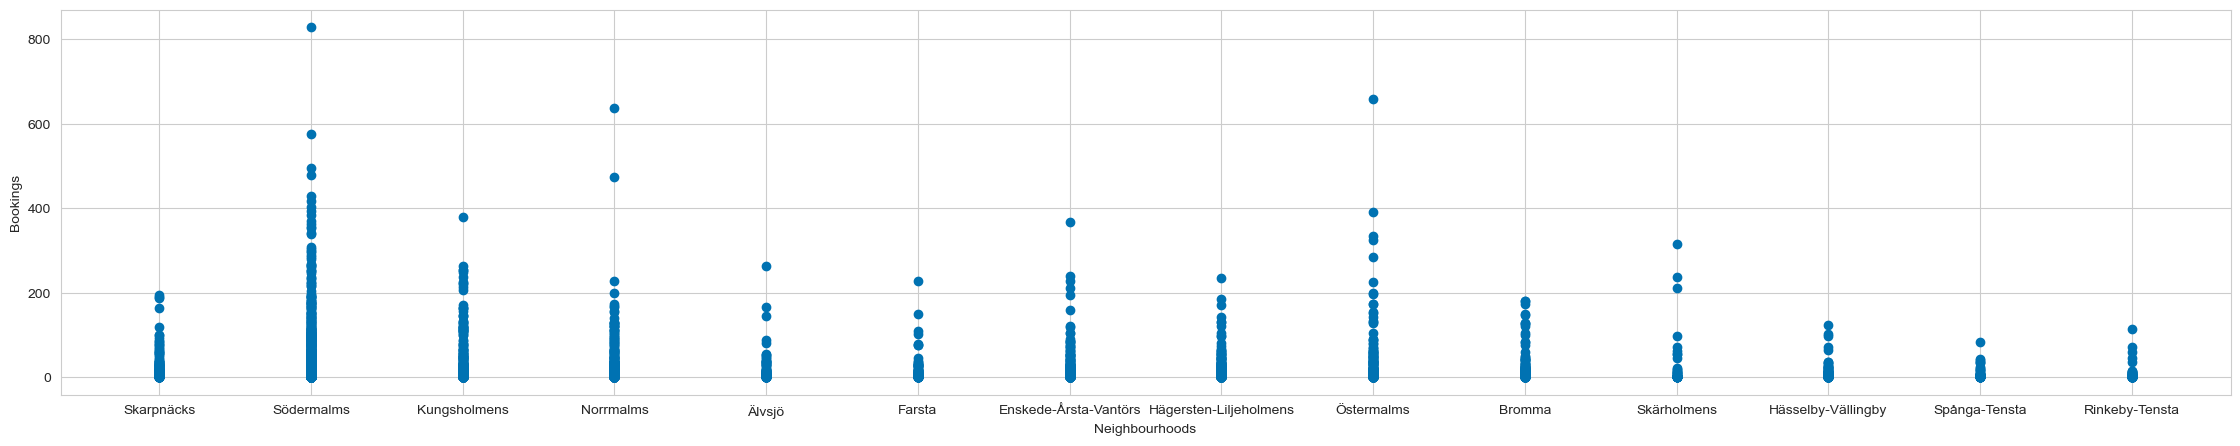

In [35]:
# Analyzing bookings using scatterplot accross neighborhood
fig, ax = plt.subplots(figsize=(28, 5))
ax.scatter(dp_airbnb_df['neighbourhood_cleansed'], dp_airbnb_df['bookings'])

ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Bookings')
plt.show()

In [36]:
#Lets create another copy for analyzing desnity check of listing on Map using lat and log data provided in original dataset

dp_airbnb_mp = airbnb_df.copy()

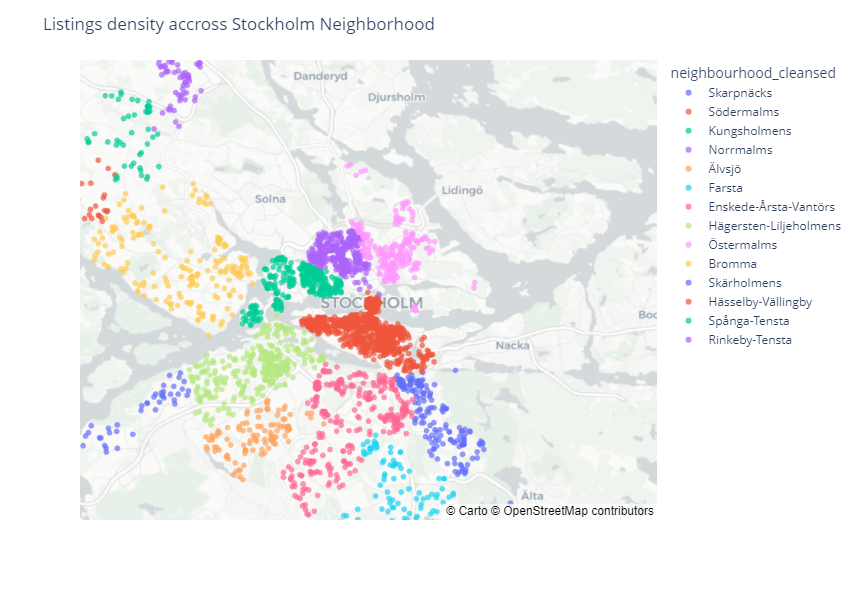

In [40]:
# Group the data by neighborhood
df_grouped = dp_airbnb_mp.groupby(["neighbourhood_cleansed"])

# Plot the map with markers and legends
fig = px.scatter_mapbox(dp_airbnb_mp, lat="latitude", lon="longitude", color="neighbourhood_cleansed" ,
                        hover_data=["id", "price", "room_type", "review_scores_rating", "reviews_per_month"],
                        zoom=10, height=600, opacity=0.7)

fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=10, mapbox_center = {"lat": 59.3293, "lon": 18.0686})
fig.update_layout(title_text="Listings density accross Stockholm Neighborhood")

fig.show()

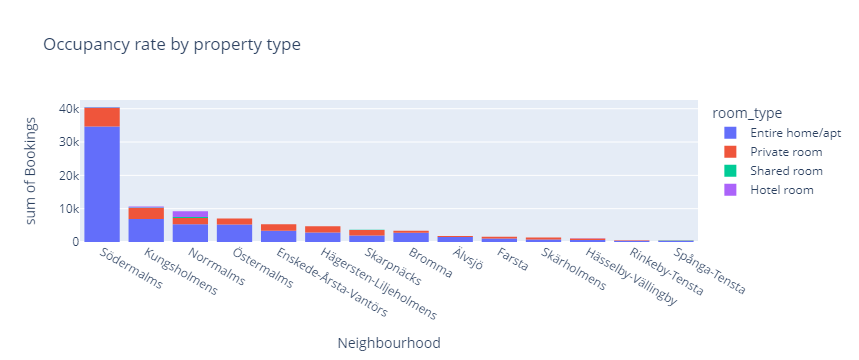

In [39]:
# Visual Python: Visualization > Plotly
fig = px.histogram(dp_airbnb_df, x='neighbourhood_cleansed', y='bookings', color='room_type', title='Occupancy rate by property type', labels={ 'neighbourhood_cleansed': 'Neighbourhood', 'bookings': 'Bookings' })
fig.update_xaxes(categoryorder='total descending')
fig.show()